In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import warnings

from scipy.stats.mstats import winsorize 
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL

# New package installed with this learning module 20191118
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [20]:
kagle = dict(
    drivername="postgresql", 
    username="dsbc_student", 
    password="7*.8G9QH21", 
    host="142.93.121.174", 
    port="5432", 
    database="youtube"
)

engine = create_engine(URL(**kagle), echo=True)

youtube_df = pd.read_sql_query("SELECT * FROM youtube", con=engine)

engine.dispose()

2019-11-18 08:44:35,091 INFO sqlalchemy.engine.base.Engine select version()
2019-11-18 08:44:35,094 INFO sqlalchemy.engine.base.Engine {}
2019-11-18 08:44:35,191 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-11-18 08:44:35,193 INFO sqlalchemy.engine.base.Engine {}
2019-11-18 08:44:35,295 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-18 08:44:35,296 INFO sqlalchemy.engine.base.Engine {}
2019-11-18 08:44:35,345 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-18 08:44:35,347 INFO sqlalchemy.engine.base.Engine {}
2019-11-18 08:44:35,396 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-11-18 08:44:35,396 INFO sqlalchemy.engine.base.Engine {}
2019-11-18 08:44:35,492 INFO sqlalchemy.engine.base.Engine SELECT * FROM youtube
2019-11-18 08:44:35,493 INFO sqlalchemy.engine.base.Engine {}


In [21]:
# Make sure that the Video Uploads and Subscribers variables are coming in as objects
youtube_df[["Video Uploads", "Subscribers"]] = youtube_df[["Video Uploads", "Subscribers"]].astype(dtype="object")

# Deal with the missing values
youtube_df["Video Uploads"] = youtube_df["Video Uploads"].apply(str.strip).replace("--", np.nan)
youtube_df["Video Uploads"] = pd.to_numeric(youtube_df["Video Uploads"], downcast="float")

youtube_df["Subscribers"] = youtube_df["Subscribers"].apply(str.strip).replace("--", np.nan)
youtube_df["Subscribers"] = pd.to_numeric(youtube_df["Subscribers"], downcast="float")

youtube_df["Grade"] = youtube_df["Grade"].apply(str.strip).replace("", np.nan)

youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean(), inplace=True)
youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean(), inplace=True)

youtube_df["winsorized_uploads"] = winsorized_uploads = winsorize(youtube_df["Video Uploads"], (0, 0.10))
youtube_df["winsorized_subscribers"] = winsorized_suscribers = winsorize(youtube_df["Subscribers"], (0, 0.10))
youtube_df["winsorized_views"] = winsorized_views = winsorize(youtube_df["Video Uploads"], (0, 0.10))

for i in range(0, len(youtube_df["Grade"])): 
    if pd.isnull(youtube_df["Grade"][i]):
        youtube_df["Grade"][i] = youtube_df["Grade"][i-1]

In [23]:
# Begin the data exploration
youtube_df.describe()

,Video Uploads,Subscribers,Video views,winsorized_uploads,winsorized_subscribers,winsorized_views
count,5000.000000,5000.00,5.000000e+03,5000.000000,5000.00,5000.000000
mean,3859.466797,2620021.50,1.071449e+09,1288.413818,2081598.25,1288.413818
std,17075.607422,3771402.25,2.003844e+09,1779.179321,1781480.25,1779.179321
min,1.000000,301.00,7.500000e+01,1.000000,301.00,1.000000
25%,141.000000,666802.50,1.862329e+08,141.000000,666802.50,141.000000
50%,445.000000,1544402.00,4.820548e+08,445.000000,1544402.00,445.000000
75%,1511.500000,2723181.50,1.124368e+09,1511.500000,2723181.50,1511.500000
max,422326.000000,65995312.00,4.754884e+10,5653.000000,5895361.00,5653.000000


In [24]:
# Descriptive statistics for text-based variables
youtube_df.describe(include=["O"])

,Rank,Grade,Channel name
count,5000,5000,5000
unique,5000,5,4993
top,"3,502nd",B+,Funny Vines
freq,1,2960,2


In [25]:
# Descriptive statistics for all variables
youtube_df.describe(include="all")

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,winsorized_uploads,winsorized_subscribers,winsorized_views
count,5000,5000,5000,5000.000000,5000.00,5.000000e+03,5000.000000,5000.00,5000.000000
unique,5000,5,4993,NaN,NaN,NaN,NaN,NaN,NaN
top,"3,502nd",B+,Funny Vines,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2960,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3859.466797,2620021.50,1.071449e+09,1288.413818,2081598.25,1288.413818
std,NaN,NaN,NaN,17075.607422,3771402.25,2.003844e+09,1779.179321,1781480.25,1779.179321
min,NaN,NaN,NaN,1.000000,301.00,7.500000e+01,1.000000,301.00,1.000000
25%,NaN,NaN,NaN,141.000000,666802.50,1.862329e+08,141.000000,666802.50,141.000000
50%,NaN,NaN,NaN,445.000000,1544402.00,4.820548e+08,445.000000,1544402.00,445.000000
75%,NaN,NaN,NaN,1511.500000,2723181.50,1.124368e+09,1511.500000,2723181.50,1511.500000


### Univariate visualization

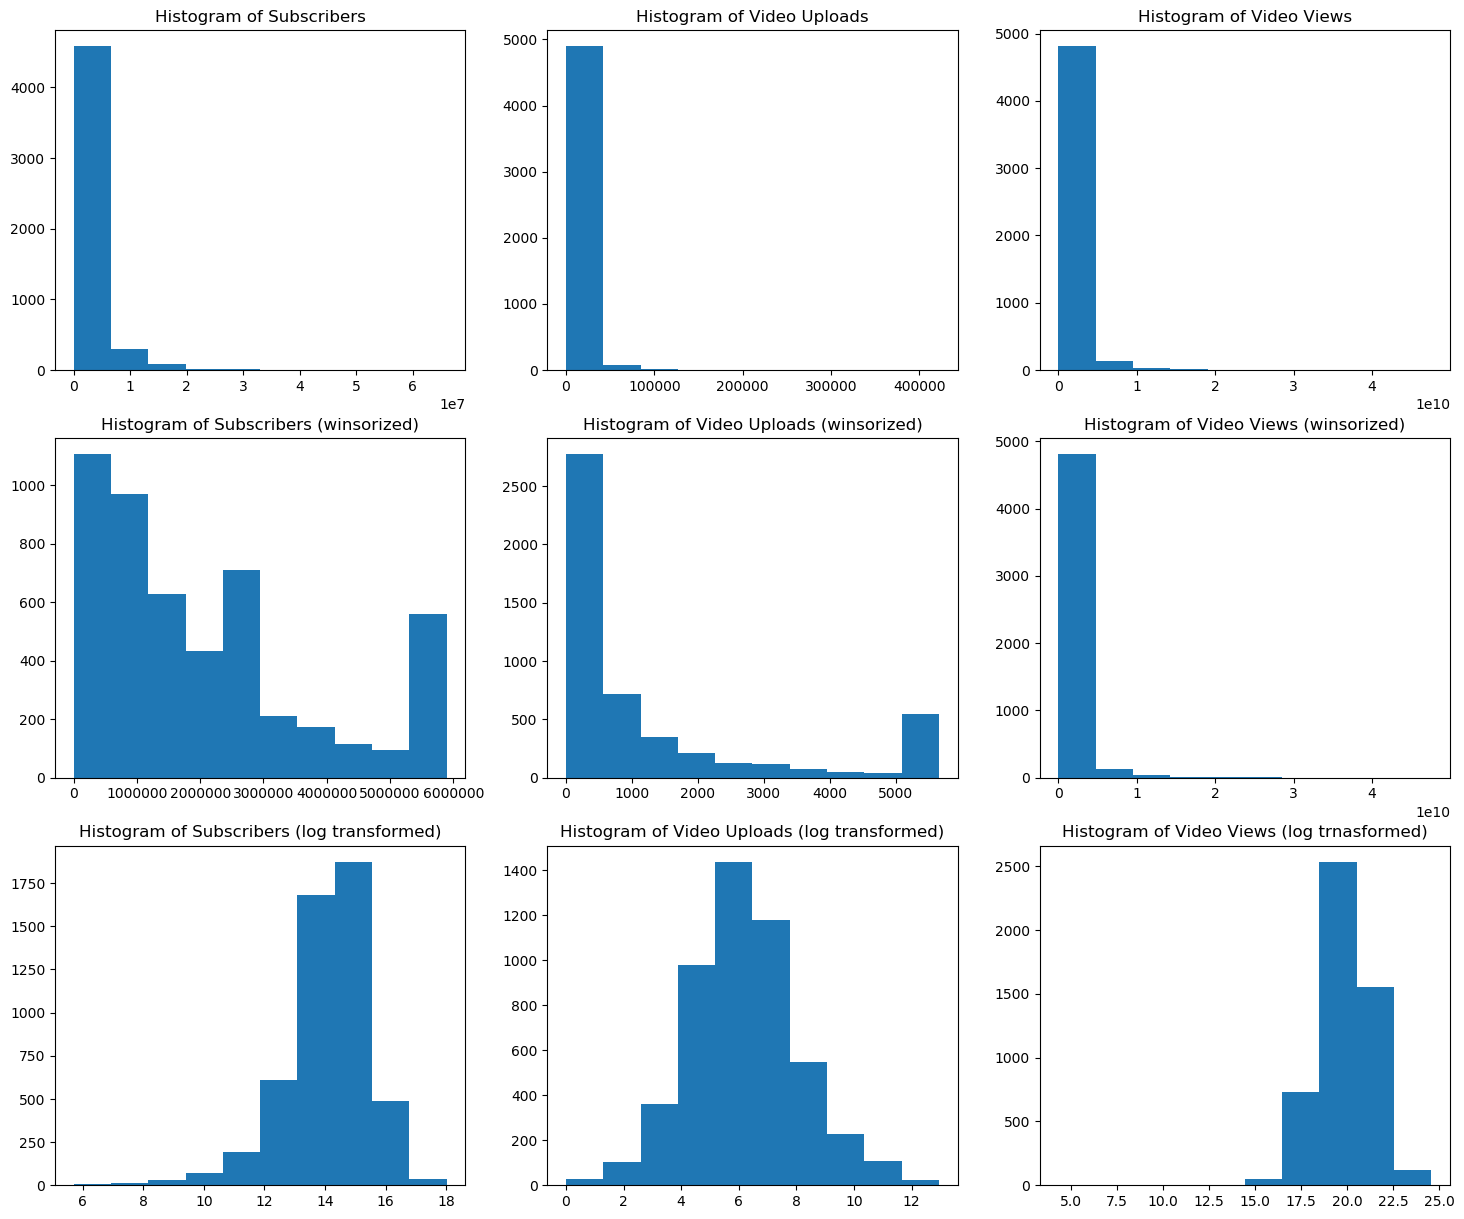

In [30]:
plt.style.use('default')
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3,3,1)
plt.hist(youtube_df["Subscribers"])
plt.title("Histogram of Subscribers")

plt.subplot(3,3,2)
plt.hist(youtube_df["Video Uploads"])
plt.title("Histogram of Video Uploads")

plt.subplot(3,3,3)
plt.hist(youtube_df["Video views"])
plt.title("Histogram of Video Views")

# Histograms of the Winsorized data
plt.subplot(3,3,4)
plt.hist(youtube_df["winsorized_subscribers"])
plt.title("Histogram of Subscribers (winsorized)")

plt.subplot(3,3,5)
plt.hist(youtube_df["winsorized_uploads"])
plt.title("Histogram of Video Uploads (winsorized)")

plt.subplot(3,3,6)
plt.hist(youtube_df["Video views"])
plt.title("Histogram of Video Views (winsorized)")

# Histograms of the Log transformed data
plt.subplot(3,3,7)
plt.hist(np.log(youtube_df["Subscribers"]))
plt.title("Histogram of Subscribers (log transformed)")

plt.subplot(3,3,8)
plt.hist(np.log(youtube_df["Video Uploads"]))
plt.title("Histogram of Video Uploads (log transformed)")


plt.subplot(3,3,9)
plt.hist(np.log(youtube_df["Video views"]))
plt.title("Histogram of Video Views (log trnasformed)")

plt.show();

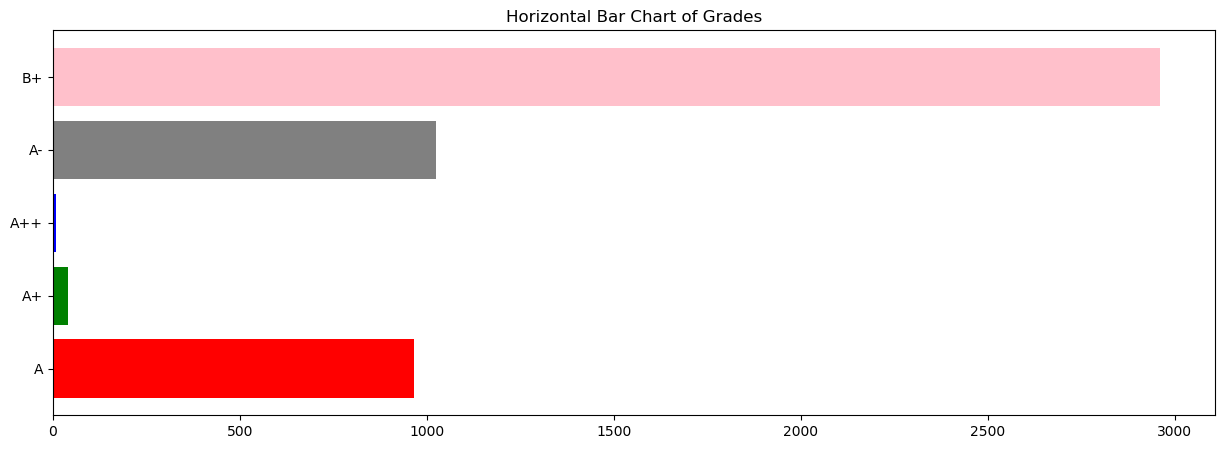

In [31]:
# Visualizing categorical data
# Bar Chart of Grades
plt.figure(figsize=(15,5))

plt.barh(
    youtube_df.groupby("Grade")["Grade"].count().index, 
    youtube_df.groupby("Grade")["Grade"].count(), 
    color=["red", "green", "blue", "grey", "pink"]
)
plt.title("Horizontal Bar Chart of Grades")

plt.show();

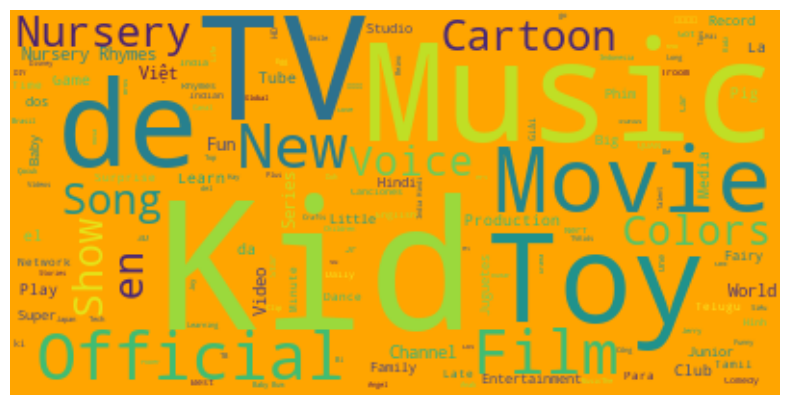

In [33]:
# Generate a Word Coud image
wordcloud = WordCloud(background_color="orange").generate("".join(youtube_df["Channel name"]))
plt.figure(figsize=(15,5))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show();

# Assignment

In [2]:
kagle = dict(
    drivername="postgresql",
    username="dsbc_student",
    password="7*.8G9QH21",
    host="142.93.121.174",
    port="5432",
    database="useducation"
)

engine = create_engine(URL(**kagle), echo=True)
usedu_df = pd.read_sql_query("SELECT * FROM useducation", con=engine)
engine.dispose()

2019-11-18 18:15:59,603 INFO sqlalchemy.engine.base.Engine select version()
2019-11-18 18:15:59,604 INFO sqlalchemy.engine.base.Engine {}
2019-11-18 18:15:59,703 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-11-18 18:15:59,705 INFO sqlalchemy.engine.base.Engine {}
2019-11-18 18:15:59,812 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-18 18:15:59,813 INFO sqlalchemy.engine.base.Engine {}
2019-11-18 18:15:59,865 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-18 18:15:59,868 INFO sqlalchemy.engine.base.Engine {}
2019-11-18 18:15:59,920 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-11-18 18:15:59,921 INFO sqlalchemy.engine.base.Engine {}
2019-11-18 18:16:00,023 INFO sqlalchemy.engine.base.Engine SELECT * FROM useducation
2019-11-18 18:16:00,026 INFO sqlalchemy.engine.base.Engine {}


### _1. Derive the descriptive statistics of the data and discuss the points you find remarkable._

In [22]:
# decimals = usedu_df.select_dtypes(include="float64").columns
# usedu_df = usedu_df.round(dict(YEAR=4))
# pd.options.display.float_format = "{:,.4f}".format
# usedu_df["YEAR"] = usedu_df["YEAR"].map("{:0f}".format)
usedu_df_copy = usedu_df.copy()
usedu_df_copy["YEAR"] = usedu_df_copy["YEAR"].astype("category")
desc = usedu_df_copy.describe()
desc.loc["count"] = desc.loc["count"].astype(int).astype(str)
desc.iloc[1:] = desc.iloc[1:].applymap("{:,.4f}".format)
print_df = pd.DataFrame(desc)
print_df

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1229,1280,1280,1280,1280,1280,1280,1280,1229,1280,...,1361,1361,1361,1361,1361,1319,536,532,533,498
mean,"915,930.8210","9,092,081.8586","766,372.3359","4,216,552.9477","4,109,156.5688","9,196,680.8688","4,762,966.3742","2,680,330.6758","429,204.6168","902,769.2945",...,"64,538.9273","64,271.0573","54,268.9243","519,214.0360","247,071.3519","802,441.5125",234.7683,278.4147,218.8662,263.6611
std,"1,065,280.4240","11,745,187.3975","1,145,241.5879","5,543,071.9956","5,482,970.6079","11,978,126.8957","6,293,003.7250","3,353,348.5591","534,069.3187","1,327,561.8152",...,"80,293.3876","78,910.5458","67,889.2762","643,638.4262","307,705.6291","970,703.0750",10.2215,10.1597,7.7696,6.8037
min,"43,866.0000","465,650.0000","31,020.0000",0.0000,"22,093.0000","481,665.0000","265,549.0000","139,963.0000","11,541.0000","12,708.0000",...,633.0000,437.0000,311.0000,"4,878.0000","1,808.0000","7,254.0000",187.1347,232.8315,178.5576,236.3791
25%,"258,314.0000","2,186,305.2500","189,354.0000","1,153,097.2500","715,834.5000","2,165,404.5000","1,168,032.0000","635,790.0000","102,831.0000","181,564.5000",...,"13,739.0000","13,342.0000","10,919.0000","110,626.0000","51,471.0000","181,065.0000",229.6944,272.7616,214.6634,259.5332
50%,"648,313.0000","5,079,546.0000","403,376.5000","2,537,073.5000","2,055,780.5000","5,234,505.5000","2,657,452.0000","1,525,405.5000","271,596.0000","510,259.5000",...,"43,272.0000","43,339.0000","36,735.0000","345,775.0000","164,260.0000","550,342.0000",237.2386,280.6188,220.4160,265.0109
75%,"1,014,528.0000","10,859,847.7500","828,966.0000","5,080,939.2500","4,768,680.0000","10,745,191.0000","5,568,028.0000","3,229,650.7500","518,600.0000","966,851.5000",...,"75,481.0000","76,566.0000","67,460.0000","611,905.0000","290,502.0000","928,275.5000",241.9955,285.3474,223.9993,268.1901
max,"6,307,022.0000","89,217,262.0000","9,990,221.0000","50,904,567.0000","36,105,265.0000","85,320,133.0000","43,964,520.0000","26,058,021.0000","3,995,951.0000","10,223,657.0000",...,"493,415.0000","500,143.0000","498,403.0000","3,929,869.0000","2,013,687.0000","5,944,746.0000",253.4210,300.5682,236.7739,280.4991
